In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("SMB_qPCR_result_summary_2019to2022.csv", encoding="windows-1252")

df

,Year,sampleID,Sample type,eventID,samplingSite,eventDate,recordedBy,decimalLatitude,decimalLongitude,volumeFiltered (mL),FilterType,occurrenceStatus,SMB Ct_1,SMB Ct_2,SMB Ct_3,SMB Pg/L_1,SMB Pg/L_2,SMB Pg/L_3
0,2019,r19D:1915,Field blank,2019-r19D:1915,NaN,NaN,DFO Gulf,NaN,NaN,1000,0.8 µm Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
1,2019,r19D:1916,Sample,2019-r19D:1916,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,325,0.8 µm Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
2,2019,r19D:1917,Sample,2019-r19D:1917,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,350,0.8 µm Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
3,2019,r19D:1918,Sample,2019-r19D:1918,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,425,0.8 µm Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
4,2019,r19D:1919,Sample,2019-r19D:1919,Site 2,8/27/2019,DFO Gulf,46.49888,-66.95682,1000,0.8 µm Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,2022,r22:2398,Sample,2022-r22:2398,Site 5,7/20/2022,DFO Gulf,46.50753,-66.94977,1000,1.2 µm Glass Fiber,Suspected,36.14,No Ct,35.02,8.70,0.00,17.59
670,2022,r22:2399,Sample,2022-r22:2399,Site 5,7/20/2022,DFO Gulf,46.50753,-66.94977,1000,1.2 µm Glass Fiber,Suspected,37.11,34.62,33.08,4.71,22.64,59.79
671,2022,r22:2400,Sample,2022-r22:2400,Site 5,7/20/2022,DFO Gulf,46.50753,-66.94977,1000,1.2 µm Glass Fiber,Suspected,36.1,34.39,34.97,8.92,26.20,18.14
672,2022,r22:2401,Field blank,2022-r22:2401,NaN,7/20/2022,DFO Gulf,NaN,NaN,1000,1.2 µm Glass Fiber,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00


In [27]:
# ok let's clean up the table
# first, we do not want any of the field blanks in the table
mask = df["Sample type"].str.match(".*blank") == False
df = df[mask]
df

,Year,sampleID,Sample type,eventID,samplingSite,eventDate,recordedBy,decimalLatitude,decimalLongitude,volumeFiltered (mL),FilterType,occurrenceStatus,SMB Ct_1,SMB Ct_2,SMB Ct_3,SMB Pg/L_1,SMB Pg/L_2,SMB Pg/L_3
1,2019,r19D:1916,Sample,2019-r19D:1916,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,325,0.8 µm Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
2,2019,r19D:1917,Sample,2019-r19D:1917,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,350,0.8 µm Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
3,2019,r19D:1918,Sample,2019-r19D:1918,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,425,0.8 µm Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
4,2019,r19D:1919,Sample,2019-r19D:1919,Site 2,8/27/2019,DFO Gulf,46.49888,-66.95682,1000,0.8 µm Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
5,2019,r19D:1920,Sample,2019-r19D:1920,Site 2,8/27/2019,DFO Gulf,46.49891,-66.95677,1000,0.8 µm Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2022,r22:2396,Sample,2022-r22:2396,Site 10,7/20/2022,DFO Gulf,46.49411,-67.01010,1000,1.2 µm Glass Fiber,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
668,2022,r22:2397,Sample,2022-r22:2397,Site 10,7/20/2022,DFO Gulf,46.49411,-67.01010,1000,1.2 µm Glass Fiber,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
669,2022,r22:2398,Sample,2022-r22:2398,Site 5,7/20/2022,DFO Gulf,46.50753,-66.94977,1000,1.2 µm Glass Fiber,Suspected,36.14,No Ct,35.02,8.70,0.00,17.59
670,2022,r22:2399,Sample,2022-r22:2399,Site 5,7/20/2022,DFO Gulf,46.50753,-66.94977,1000,1.2 µm Glass Fiber,Suspected,37.11,34.62,33.08,4.71,22.64,59.79


In [108]:
# are all latitude observations positive?
print(sum(df["decimalLatitude"] < 0))
# are all latitude observations negative?
print(sum(df["decimalLongitude"] > 0))
# clean the site names
df["samplingSite"] = df["samplingSite"].apply(lambda x: str(x).strip())
df["samplingSite"].replace("nan", "missing").replace("", "missing", inplace=True)
# for fun, lets order the table by date
df["eventDate"] = pd.to_datetime(df["eventDate"], format="%m/%d/%Y")
df = df.sort_values("eventDate")

0
0


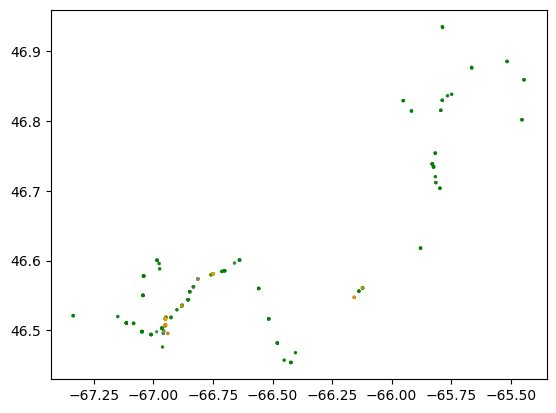

In [109]:
# df = df.sort_values("occurrenceStatus", ascending=False)

color_map = {
    'Not detected': "green",
    'Suspected': "orange",
    'Inconclusive': "grey",
    'Detected': "red",
}

colors = df["occurrenceStatus"].map(color_map)
df["color"] = colors # store this back into the df

x = df["decimalLongitude"]
y = df["decimalLatitude"]
area = (30 * np.random.rand(len(df["occurrenceStatus"])))**2  # 0 to 15 point radii
plt.scatter(x, y, s=2, c=colors, alpha=0.5)
plt.show()

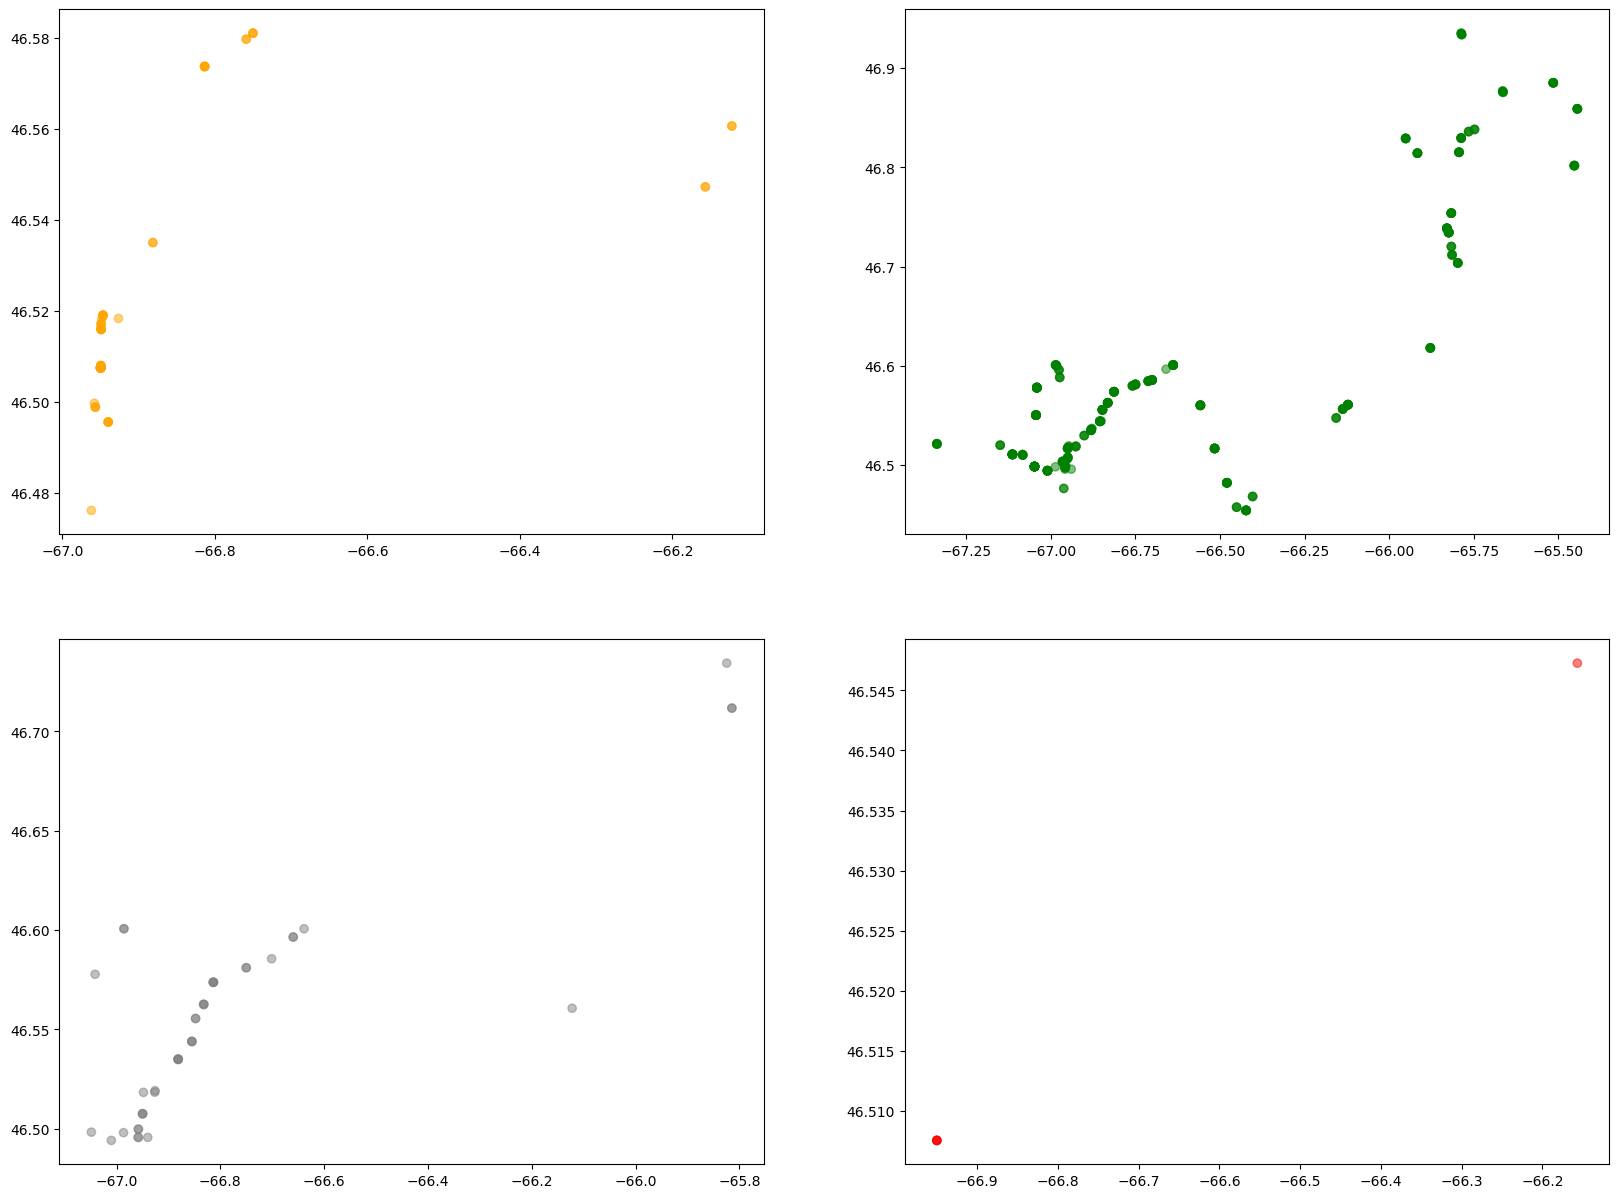

In [95]:
nrow = 2
ncol = 2
rows = range(0, nrow)
cols = range(0, ncol)
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 15))

i=0
for row in rows:
    for col in cols:
        ax = axs[row, col]
        color = colors.unique()[i]
        ax.scatter(x[colors==color], y[colors==color], c=colors[colors==color], alpha=0.5)
        i += 1

plt.show()

In [116]:
# which columns do we want to include in the final product?

subdf=df.loc[:,['Year', 'eventDate', 'recordedBy', 'decimalLatitude', 'decimalLongitude', 'occurrenceStatus', 'color']]
subdf.set_index(df["sampleID"], inplace=True)
subdf

,Year,eventDate,recordedBy,decimalLatitude,decimalLongitude,occurrenceStatus,color
sampleID,,,,,,,
r19D:1922,2019,2019-08-27,DFO Gulf,46.49718,-66.95809,Not detected,green
r19D:1926,2019,2019-08-27,DFO Gulf,46.49564,-66.93989,Suspected,orange
r19D:1938,2019,2019-08-27,DFO Gulf,46.51664,-66.95040,Not detected,green
r19D:1940,2019,2019-08-27,DFO Gulf,46.51831,-66.94831,Not detected,green
r19D:1933,2019,2019-08-27,DFO Gulf,46.51599,-66.94915,Suspected,orange
...,...,...,...,...,...,...,...
r22:2354,2022,2022-07-20,DFO Gulf,46.58102,-66.75007,Suspected,orange
r22:2400,2022,2022-07-20,DFO Gulf,46.50753,-66.94977,Suspected,orange
r20:2215,2020,NaT,DFO Gulf,NaN,NaN,Not detected,green


In [118]:
# write the final dataframe to a CSV
subdf.to_csv("./SMB_eDNA_WMS_english.csv")

# now to frenchifry...

